<a href="https://colab.research.google.com/github/dilrabonu/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import  numpy as np

## At first we have to unzip our zip file

In [2]:
import zipfile
import os

with zipfile.ZipFile('adult.zip', 'r') as zip_ref:
  zip_ref.extractall('adult_data')
os.listdir('adult_data')

['old.adult.names', 'Index', 'adult.names', 'adult.test', 'adult.data']

### Step 1
## Load Data and Inspect

In [3]:
df = pd.read_csv("adult_data/adult.data", sep=",")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Named columns with suitable ones

In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']
df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
df.duplicated().sum()

np.int64(24)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(32536, 15)

## Step 2
## Descriptive Statistics

In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


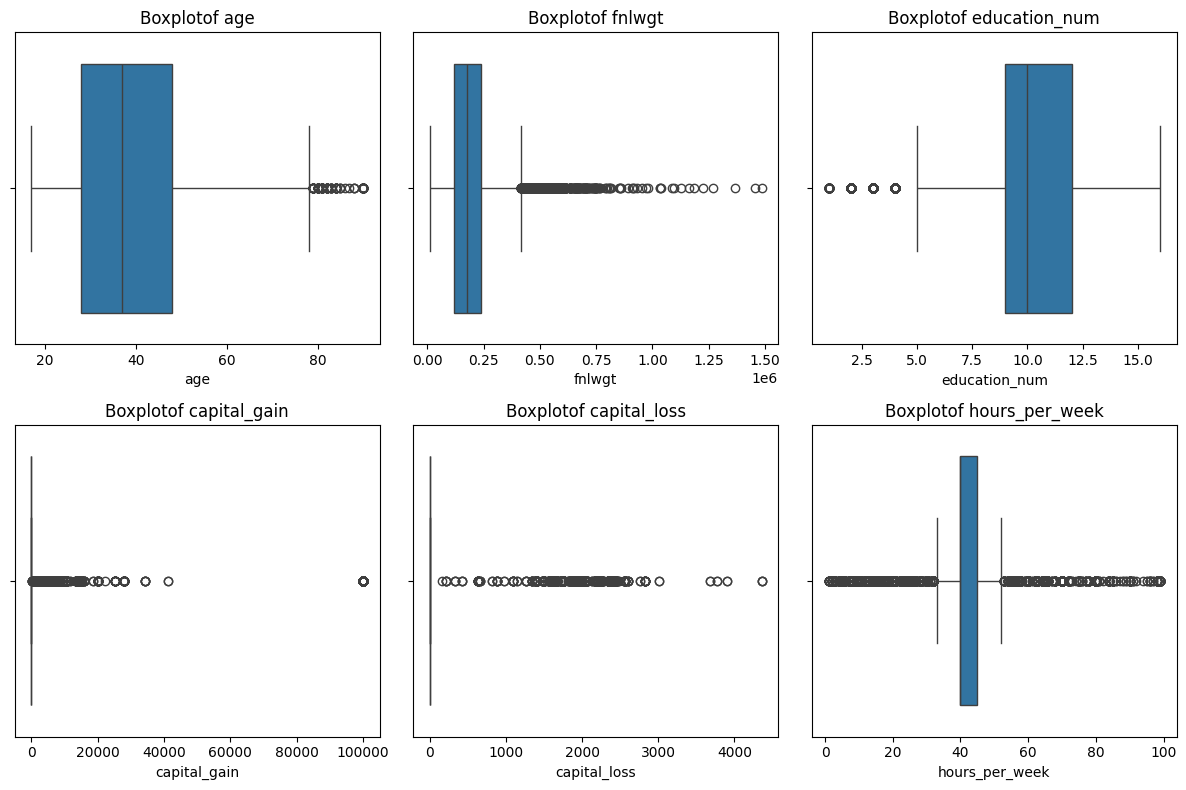

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i, col in enumerate(numeric_cols):
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplotof {col}')
plt.tight_layout()
plt.show()

In [13]:
df.drop('fnlwgt', axis=1, inplace=True)

## Step 3
## Feature Engineering

In [14]:
df['age_hours_ratio'] = df['age'] / df['hours_per_week']

df['net_capital'] = df['capital_gain'] - df['capital_loss']

df['is_married'] = df['marital_status'].apply(lambda x: 1 if 'Married' in x else 0)
df[['age', 'hours_per_week', 'age_hours_ratio', 'capital_gain', 'capital_loss', 'net_capital', 'marital_status', 'is_married']].head()

,age,hours_per_week,age_hours_ratio,capital_gain,capital_loss,net_capital,marital_status,is_married
0,50,13,3.846154,0,0,0,Married-civ-spouse,1
1,38,40,0.950000,0,0,0,Divorced,0
2,53,40,1.325000,0,0,0,Married-civ-spouse,1
3,28,40,0.700000,0,0,0,Married-civ-spouse,1
4,37,40,0.925000,0,0,0,Married-civ-spouse,1


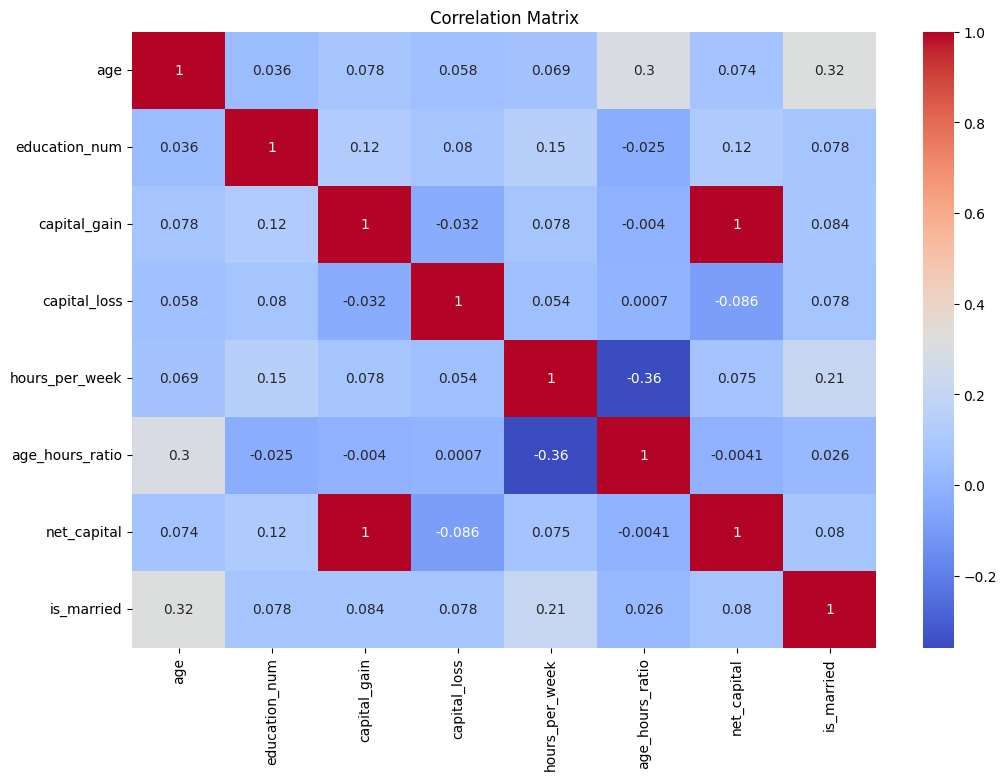

In [15]:


corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Step 4
## Univariate Analysis

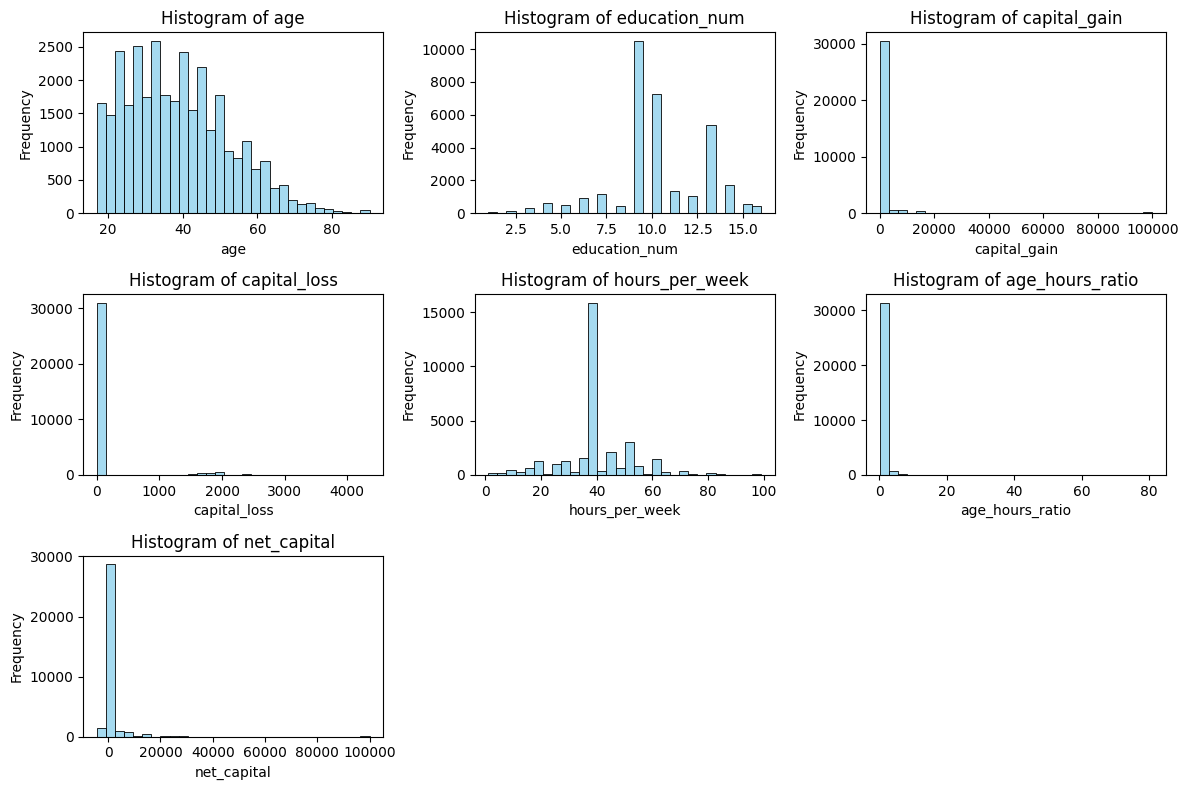

In [16]:
numeric_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'age_hours_ratio', 'net_capital']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
  plt.subplot(3, 3, i+1)
  sns.histplot(df[col], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

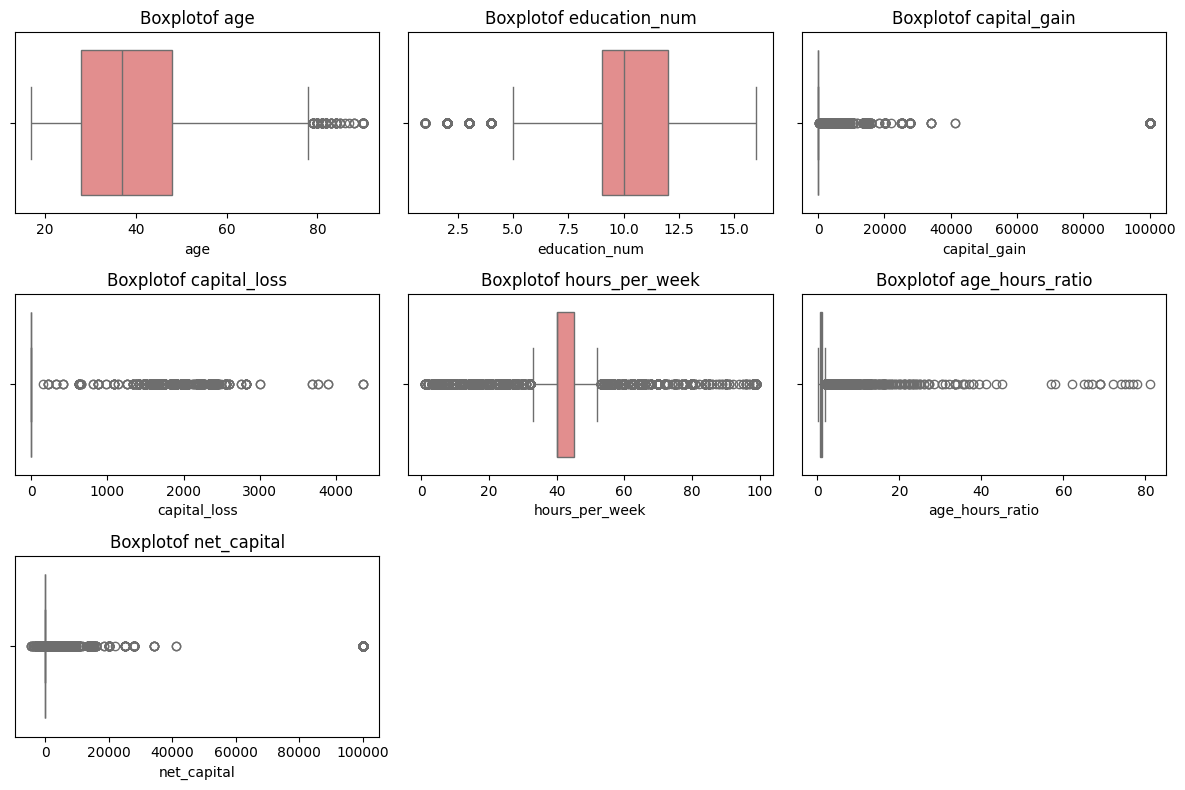

In [17]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x=df[col], color='lightcoral')
  plt.title(f'Boxplotof {col}')
plt.tight_layout()
plt.show()

## Step 5
## Bivariate Analysis

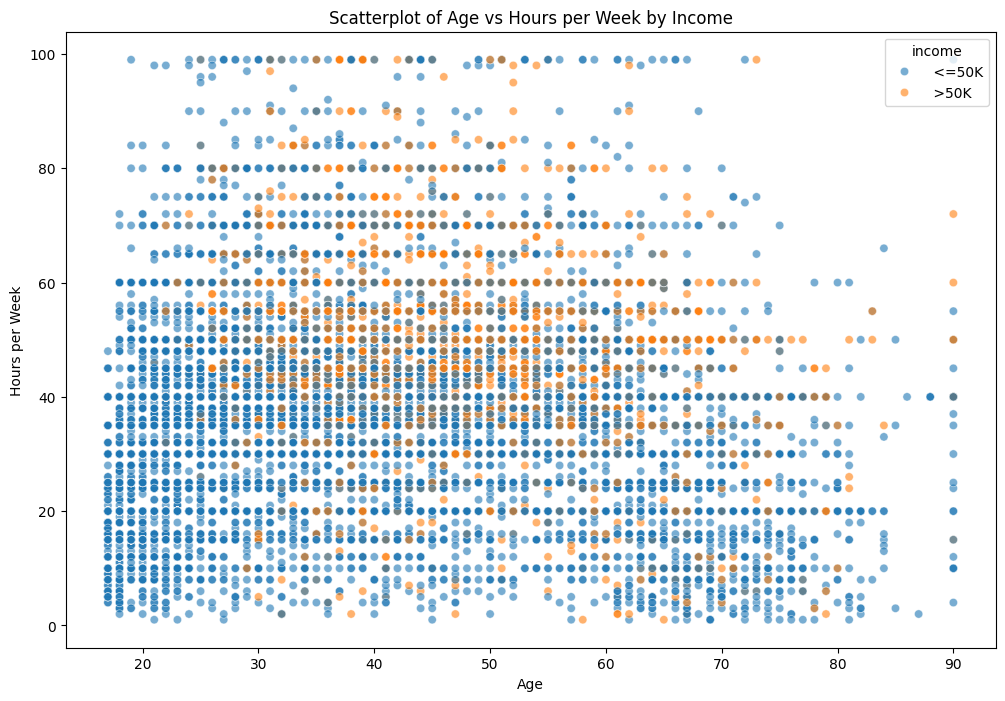

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='age', y='hours_per_week', hue='income', alpha=0.6)
plt.title('Scatterplot of Age vs Hours per Week by Income')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()


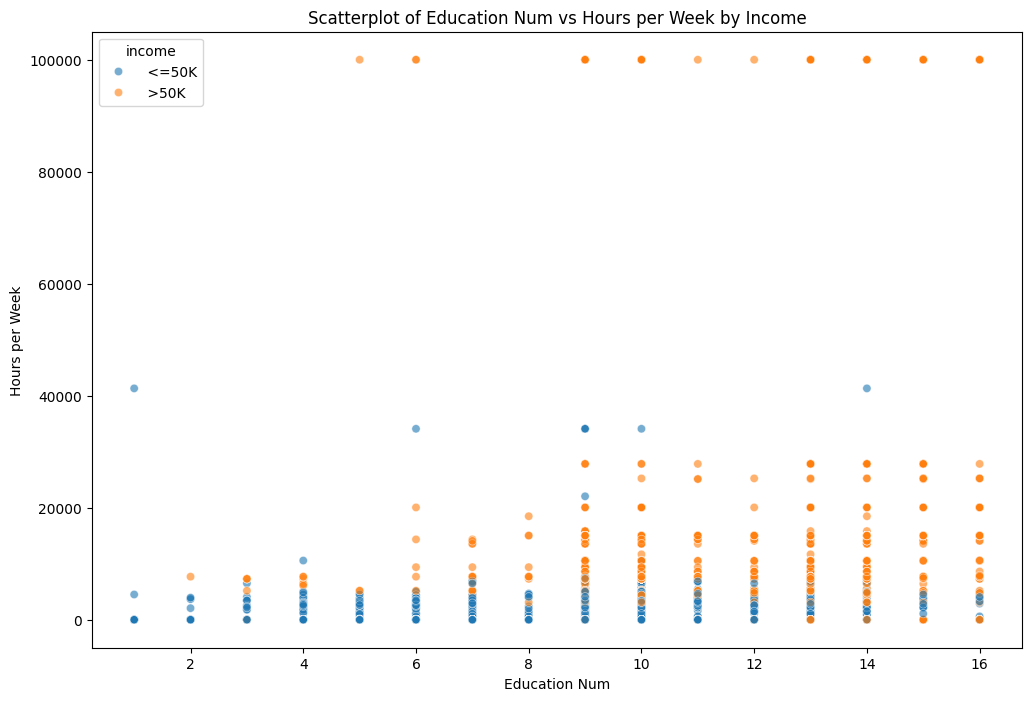

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='education_num', y='capital_gain', hue='income', alpha=0.6)
plt.title('Scatterplot of Education Num vs Hours per Week by Income')
plt.xlabel('Education Num')
plt.ylabel('Hours per Week')
plt.show()

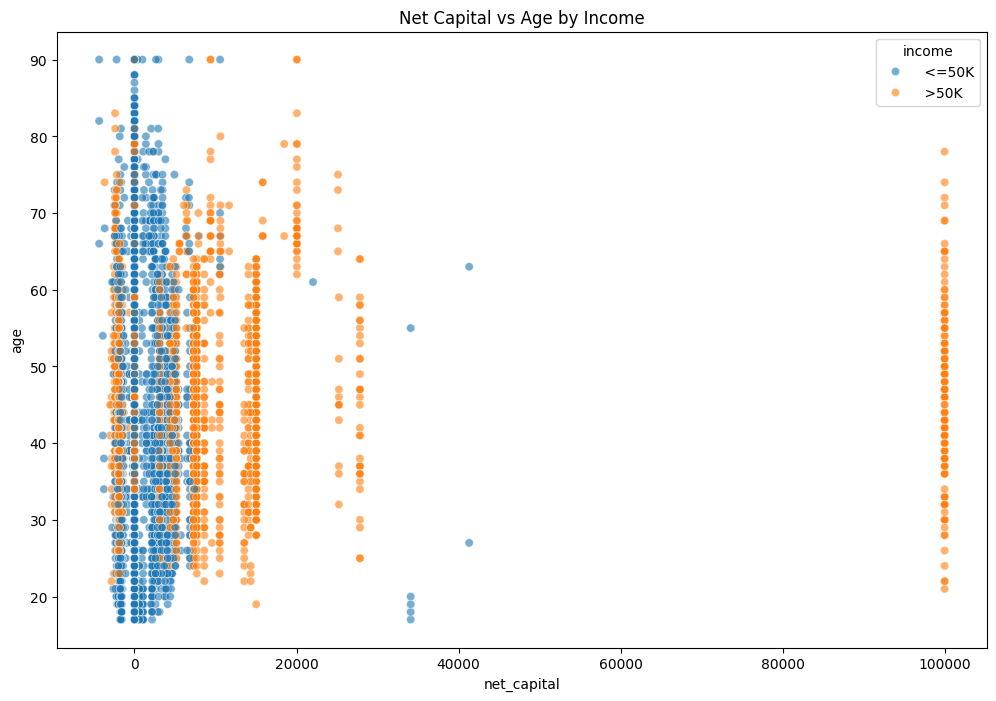

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='net_capital', y='age', hue='income', alpha=0.6)
plt.title('Net Capital vs Age by Income')
plt.show()

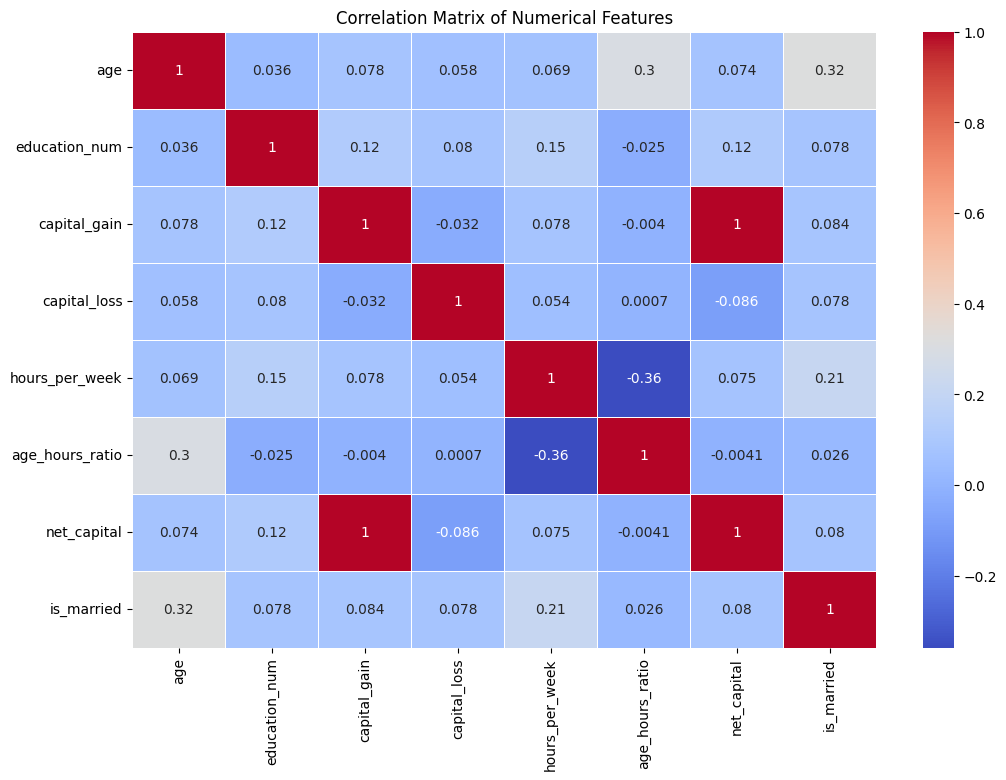

In [22]:
numeric_only = df.select_dtypes(include=['number'])

correlation_matrix = numeric_only.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

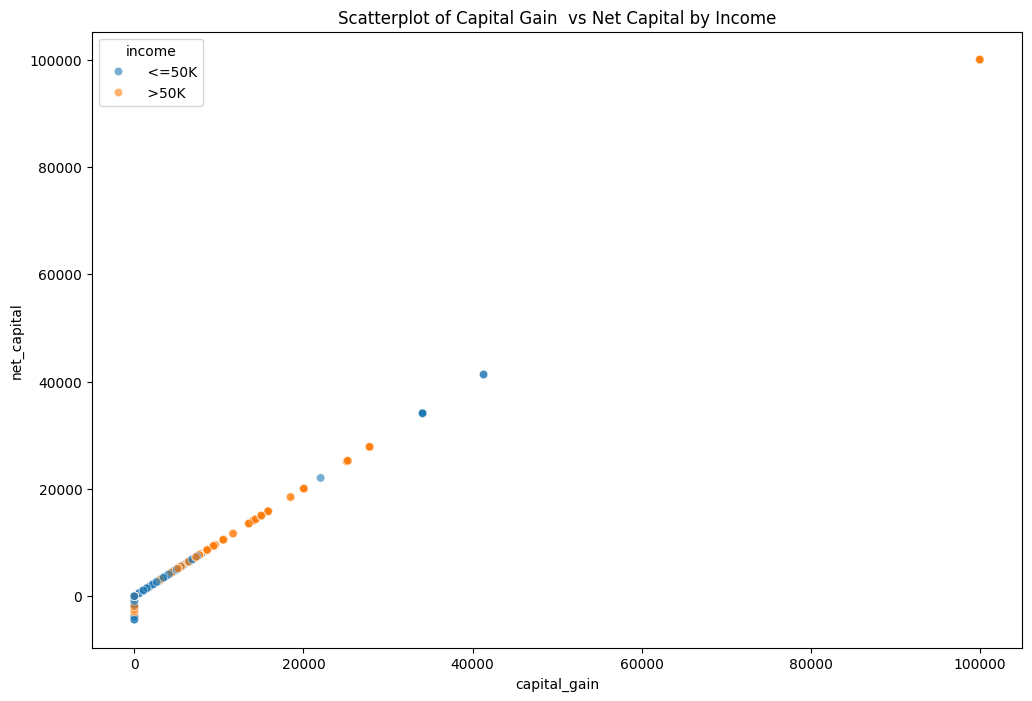

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='capital_gain', y='net_capital', hue='income', alpha=0.6)
plt.title('Scatterplot of Capital Gain  vs Net Capital by Income')
plt.show()

## Step 6
## Categorical Feature Analysis

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


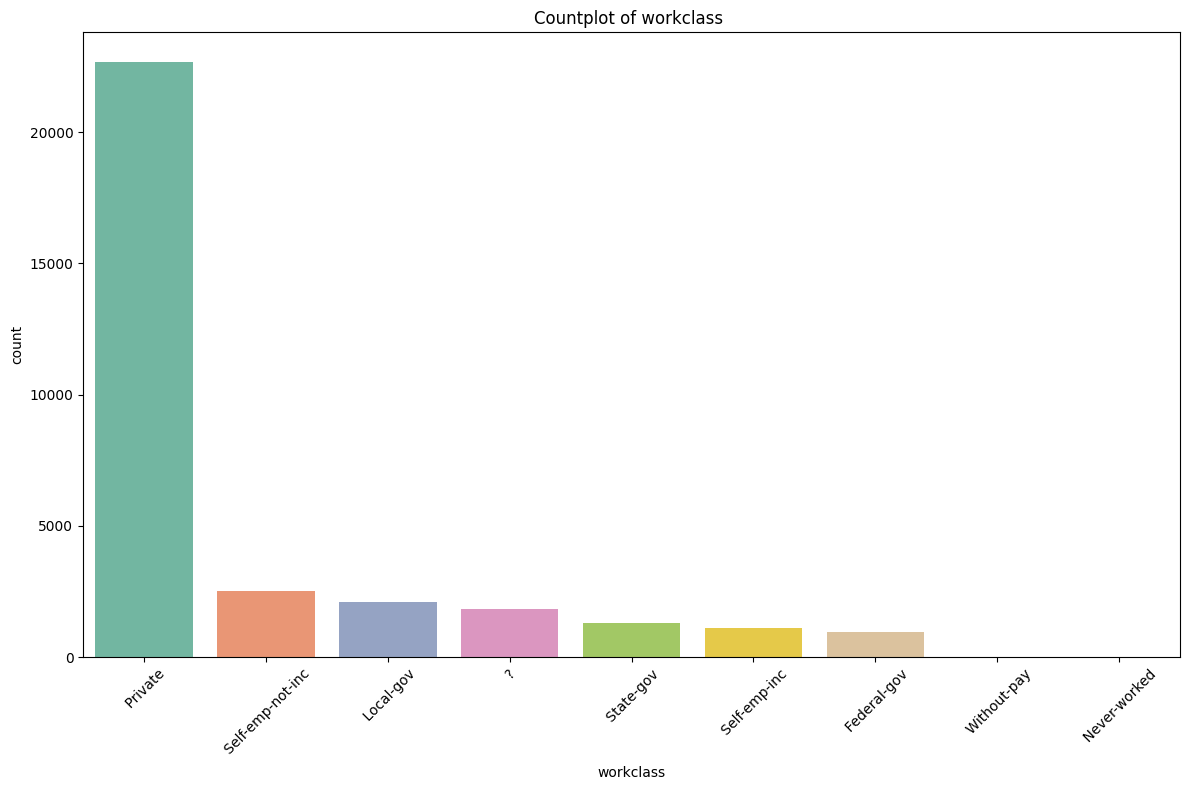

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


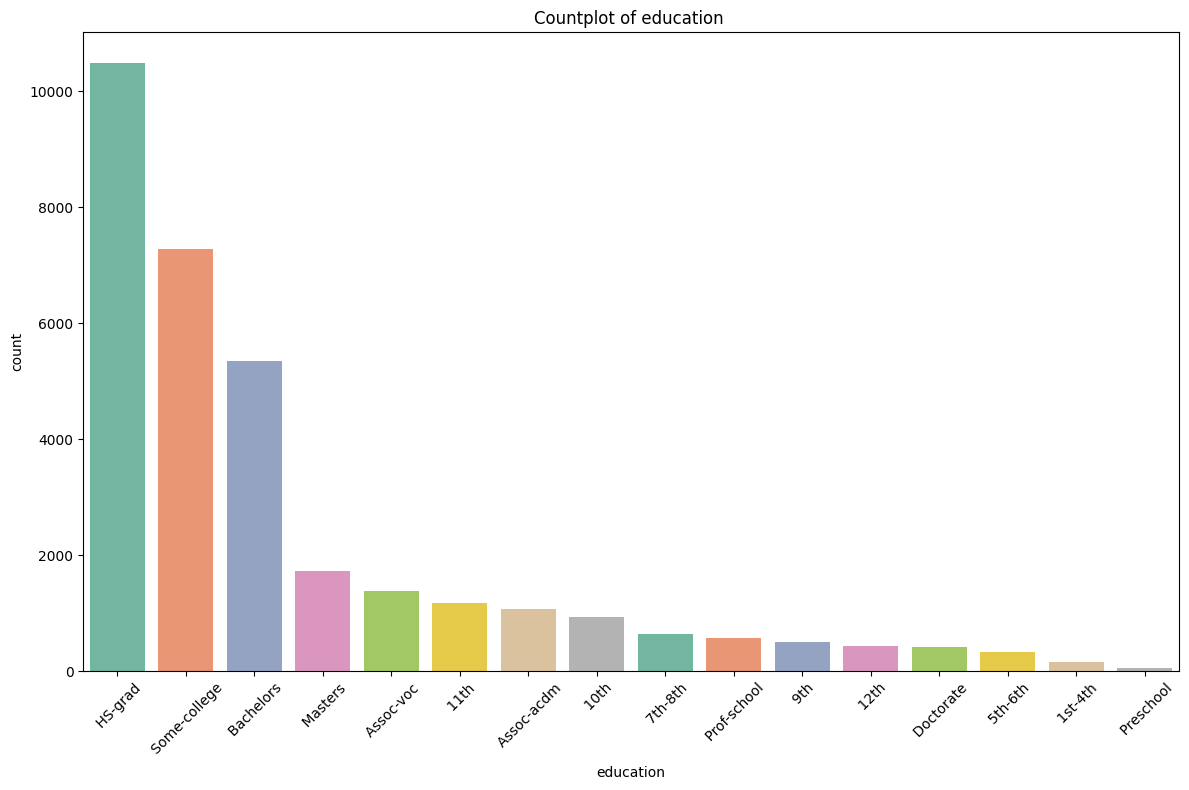

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


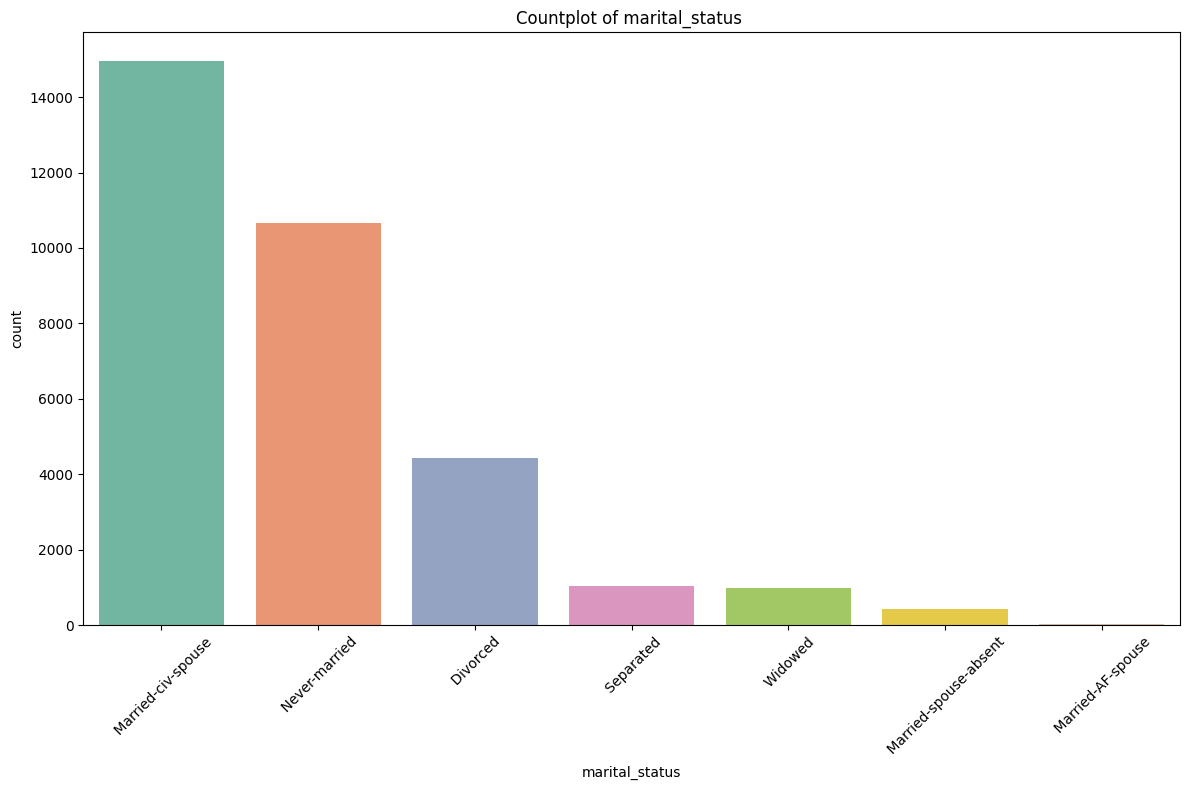

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


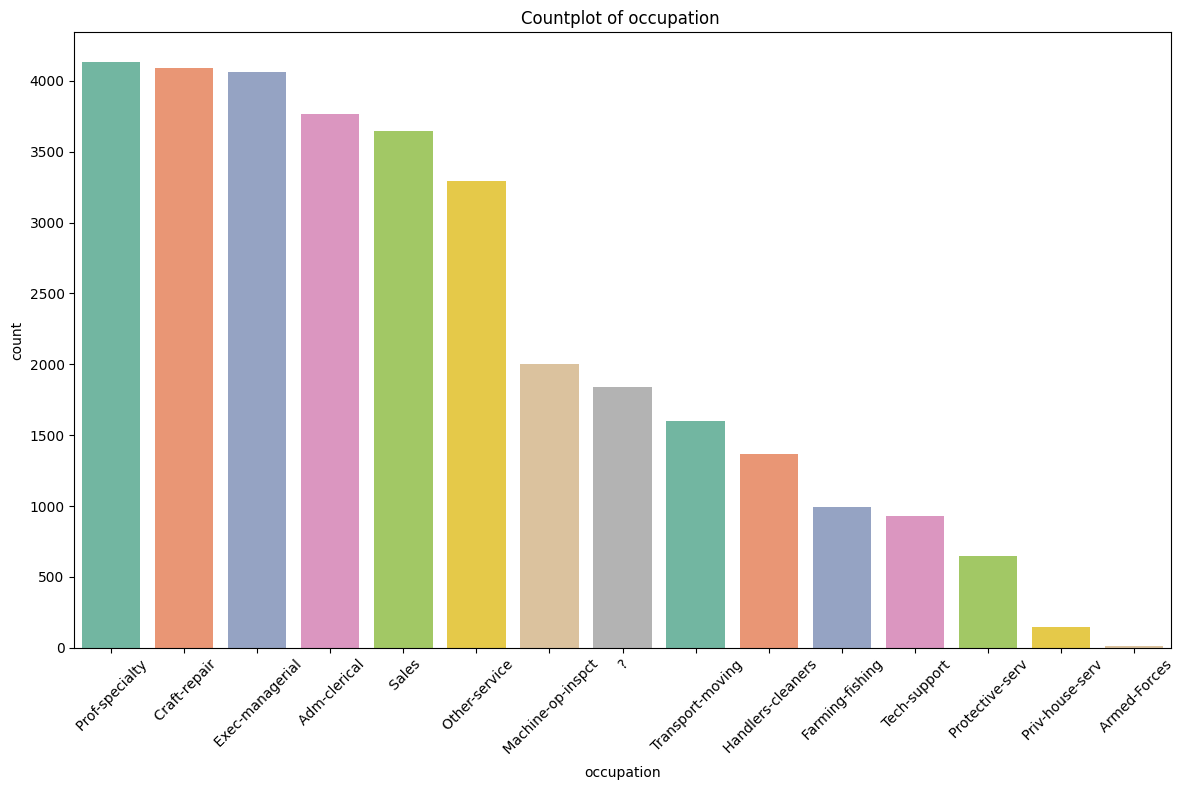

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


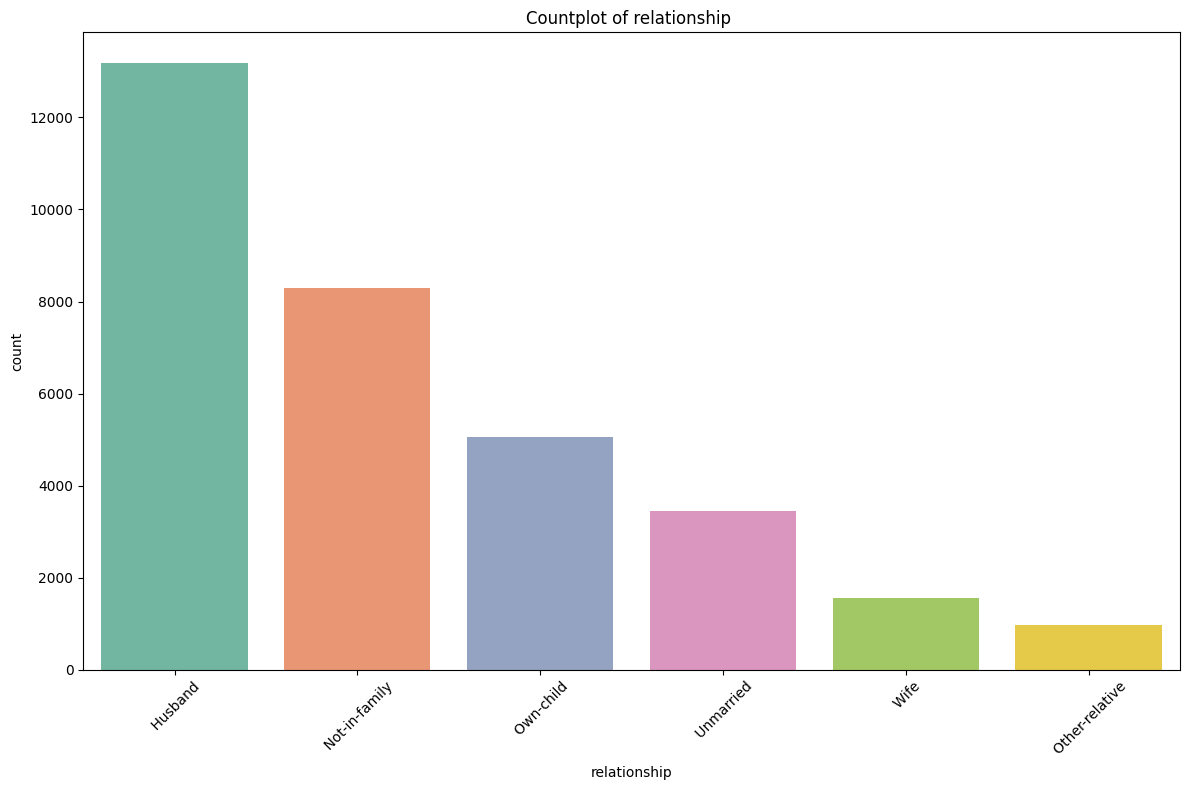

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


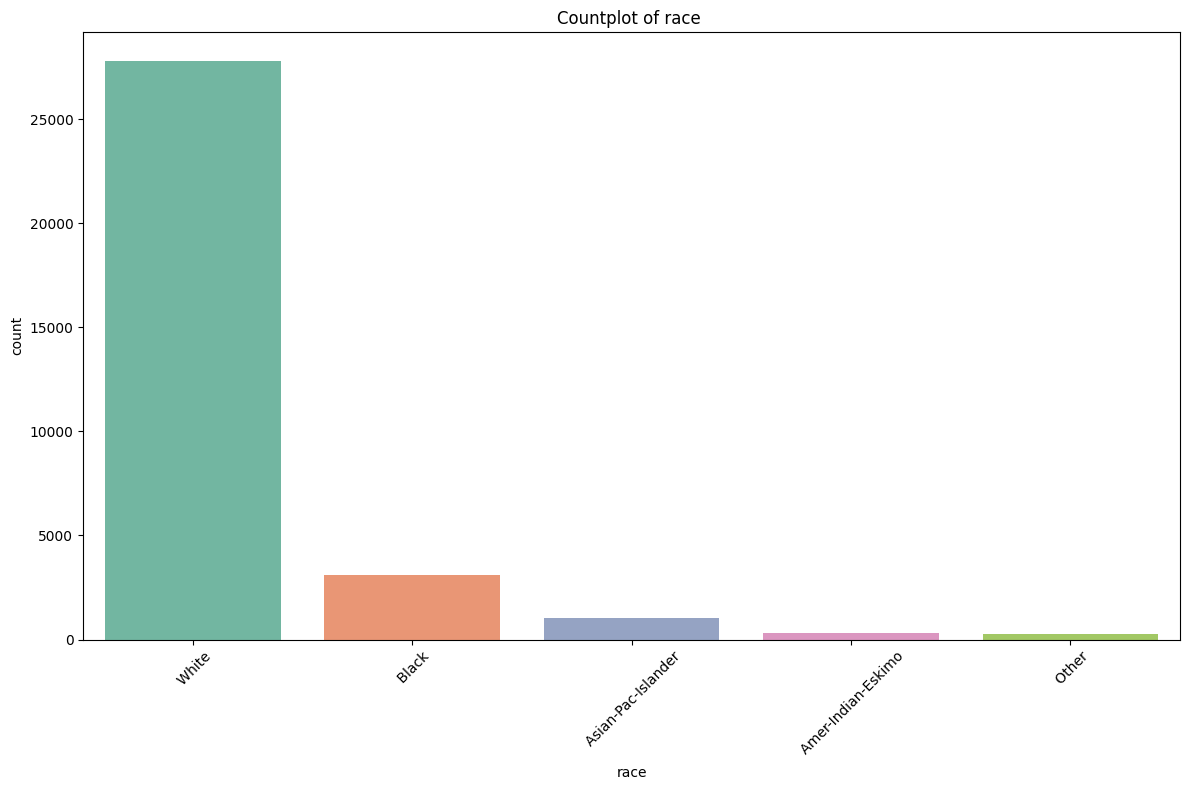

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


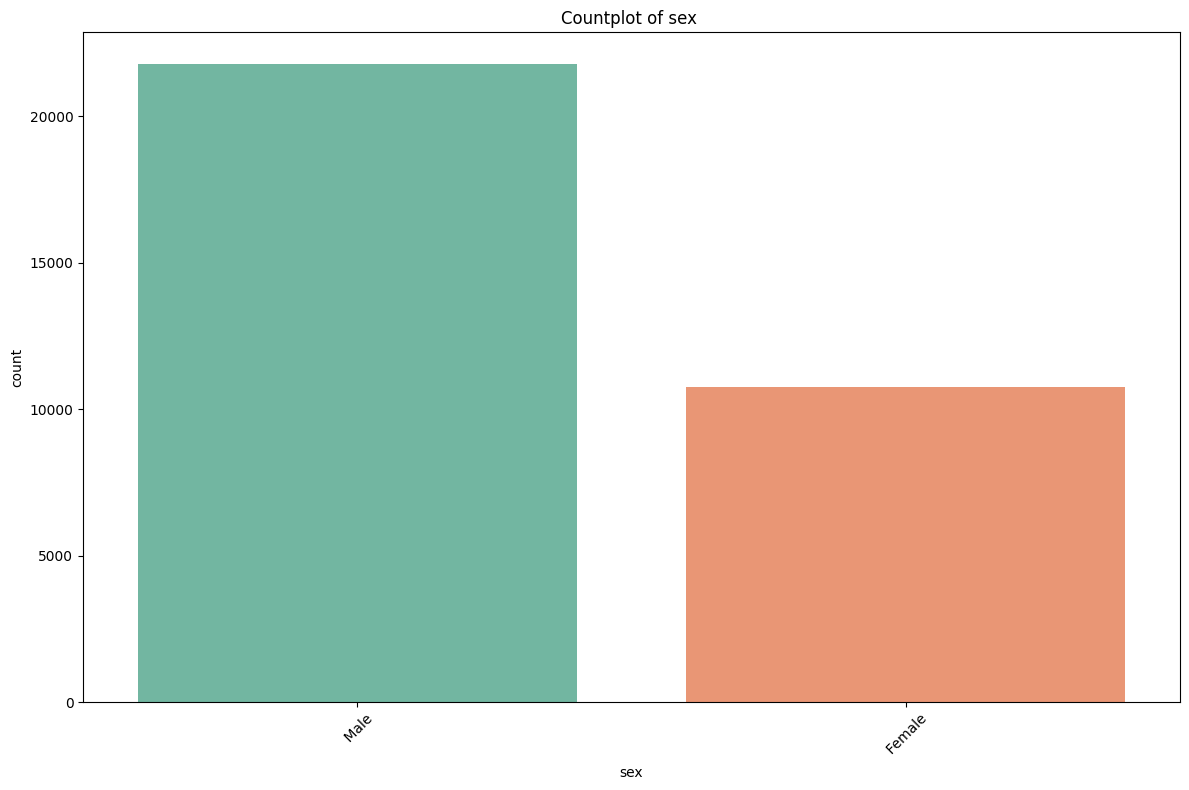

<ipython-input-30-7109e662fc1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


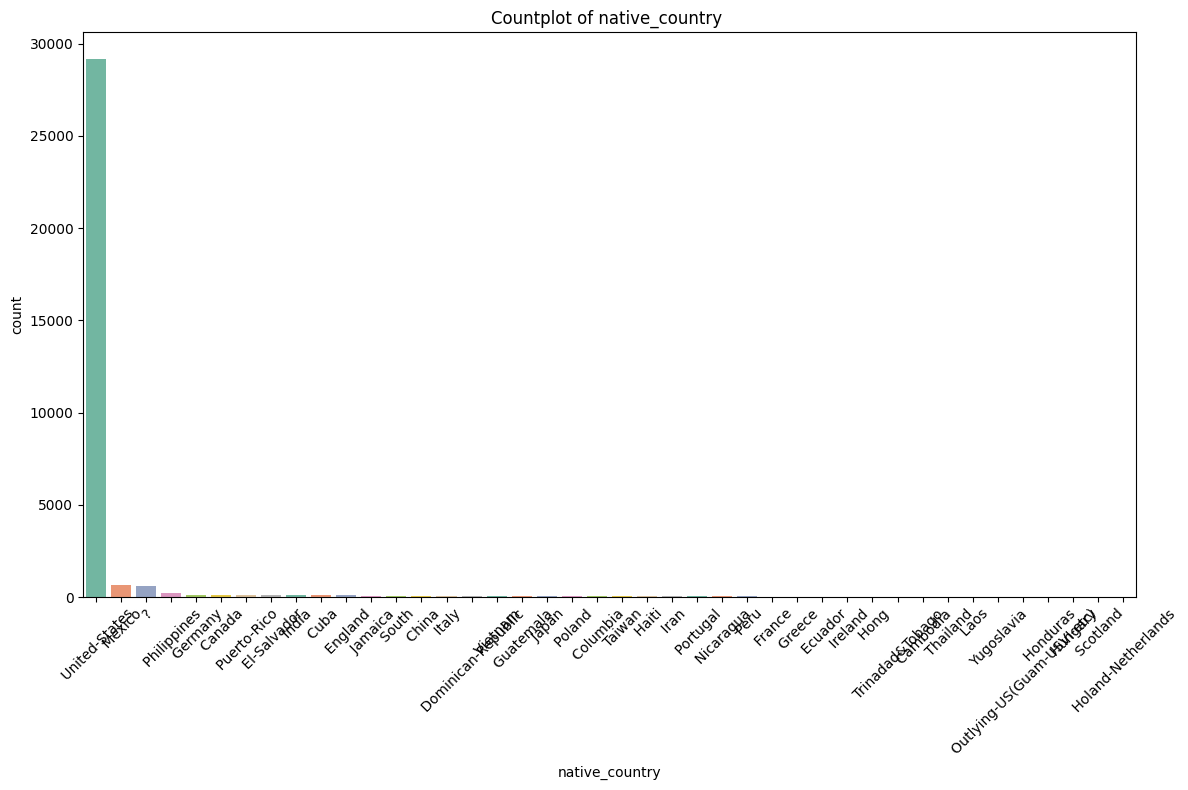

In [30]:
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for col in categorical_features:
  plt.figure(figsize=(12,8))
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
  plt.title(f'Countplot of {col} ')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

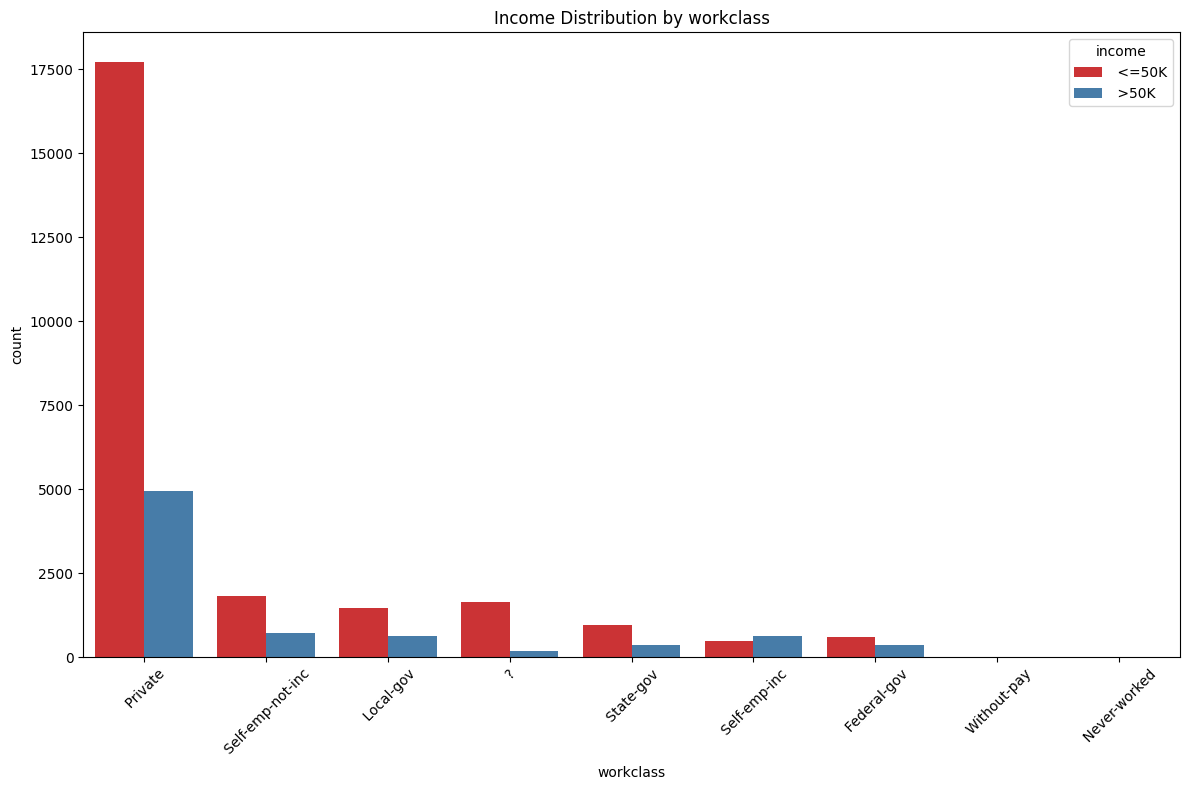

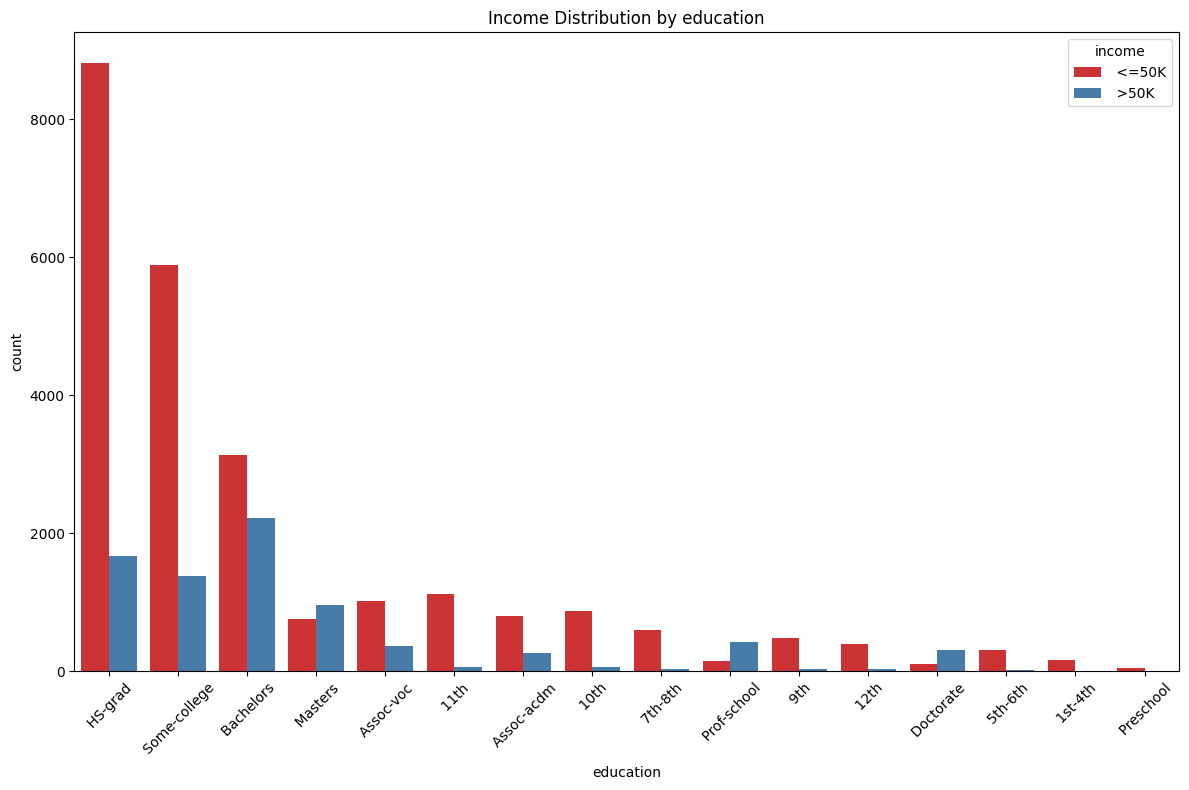

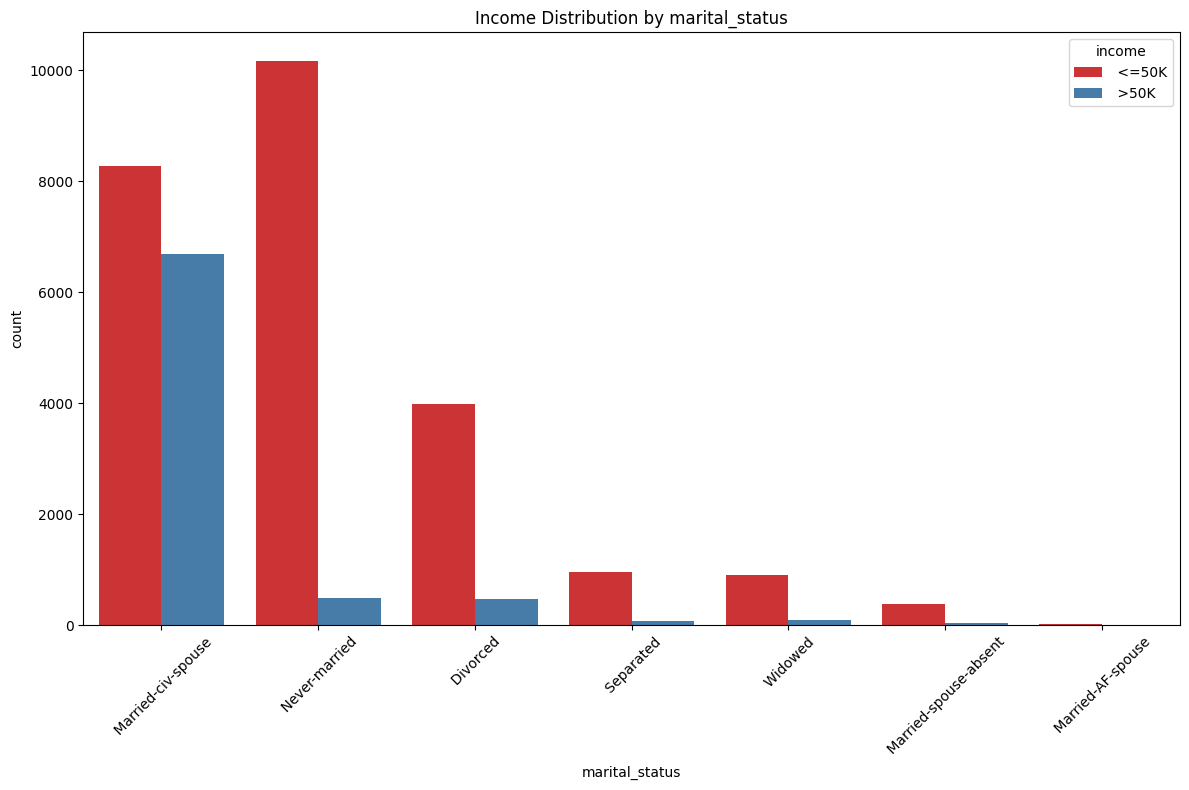

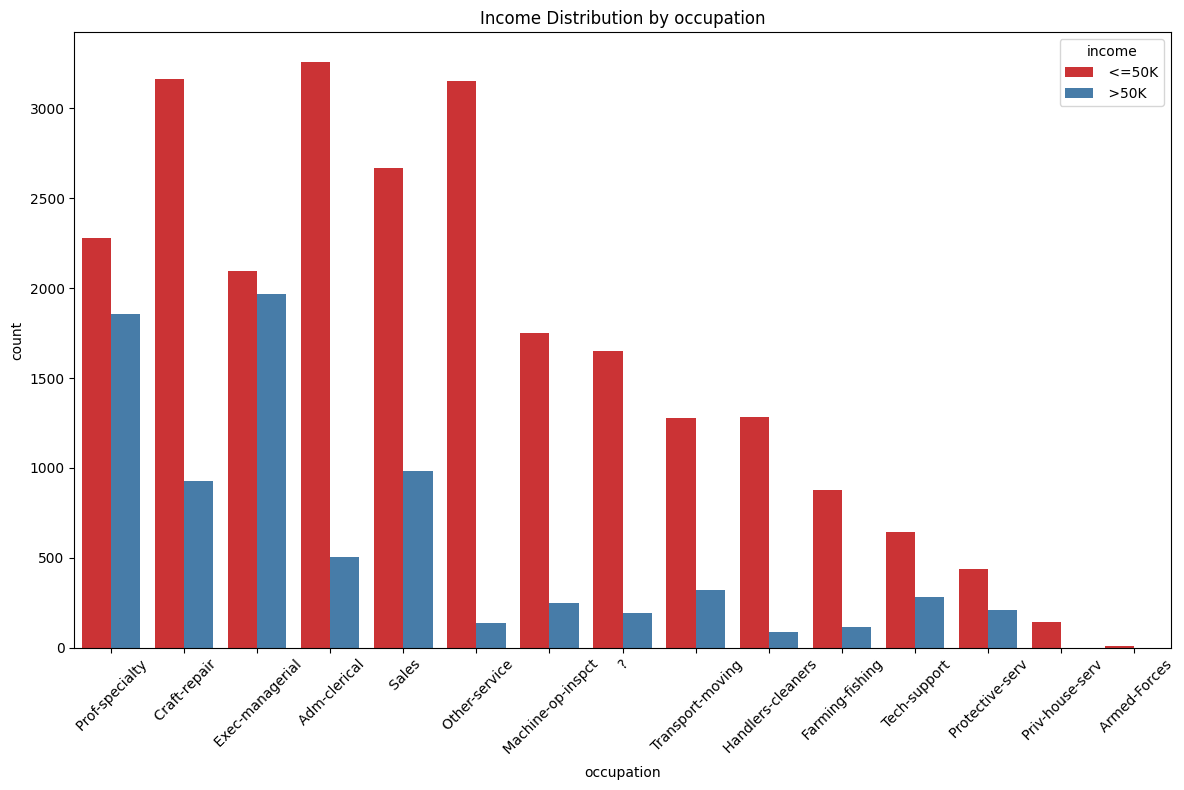

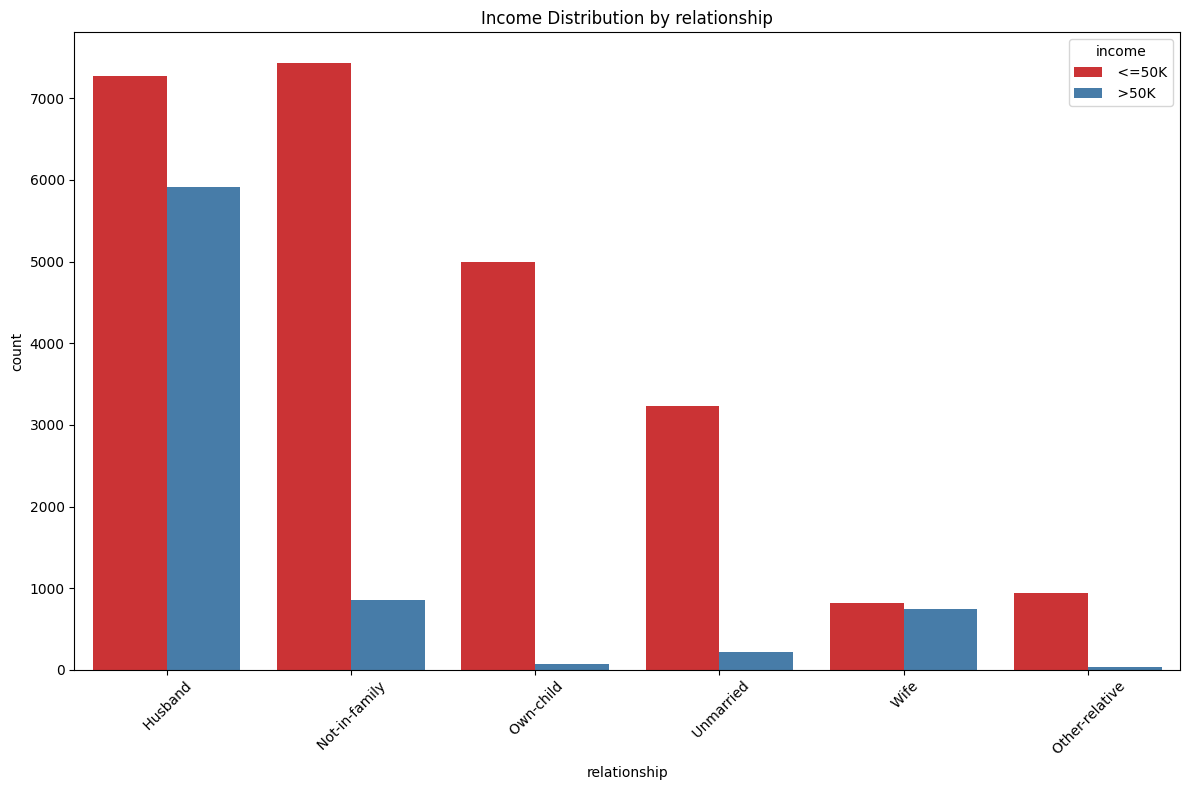

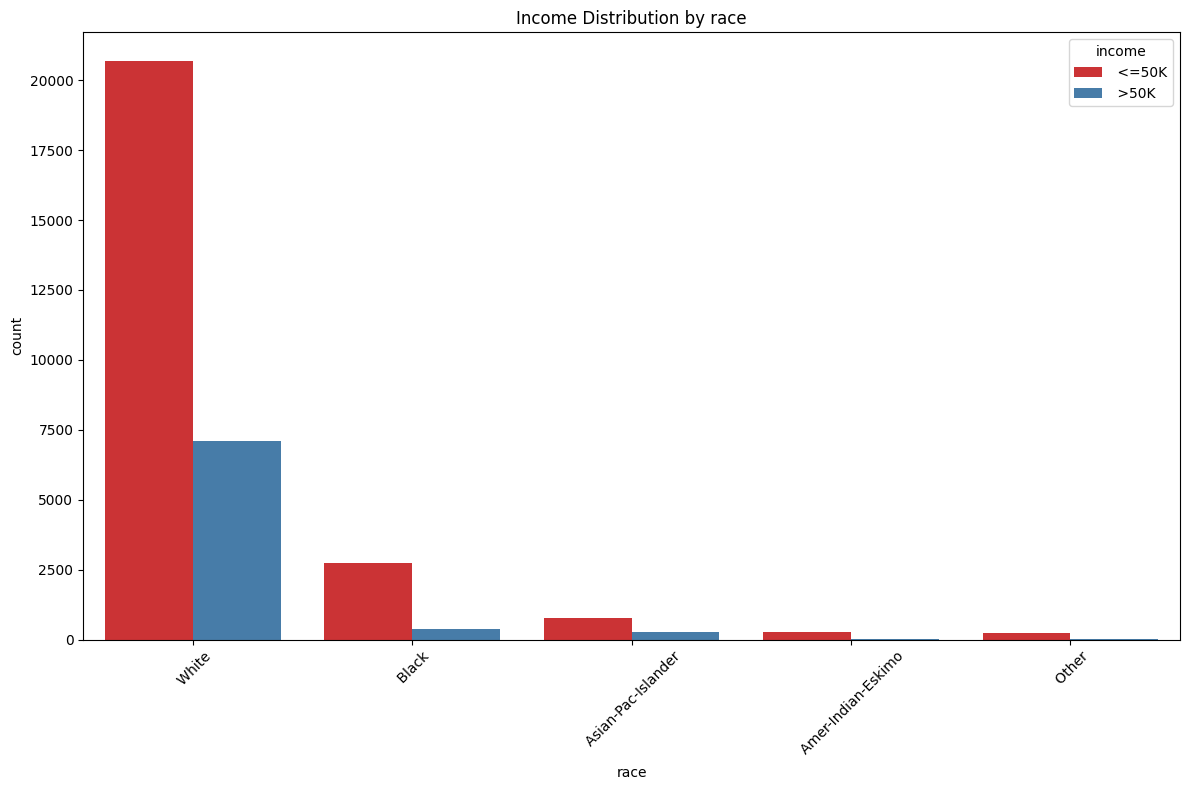

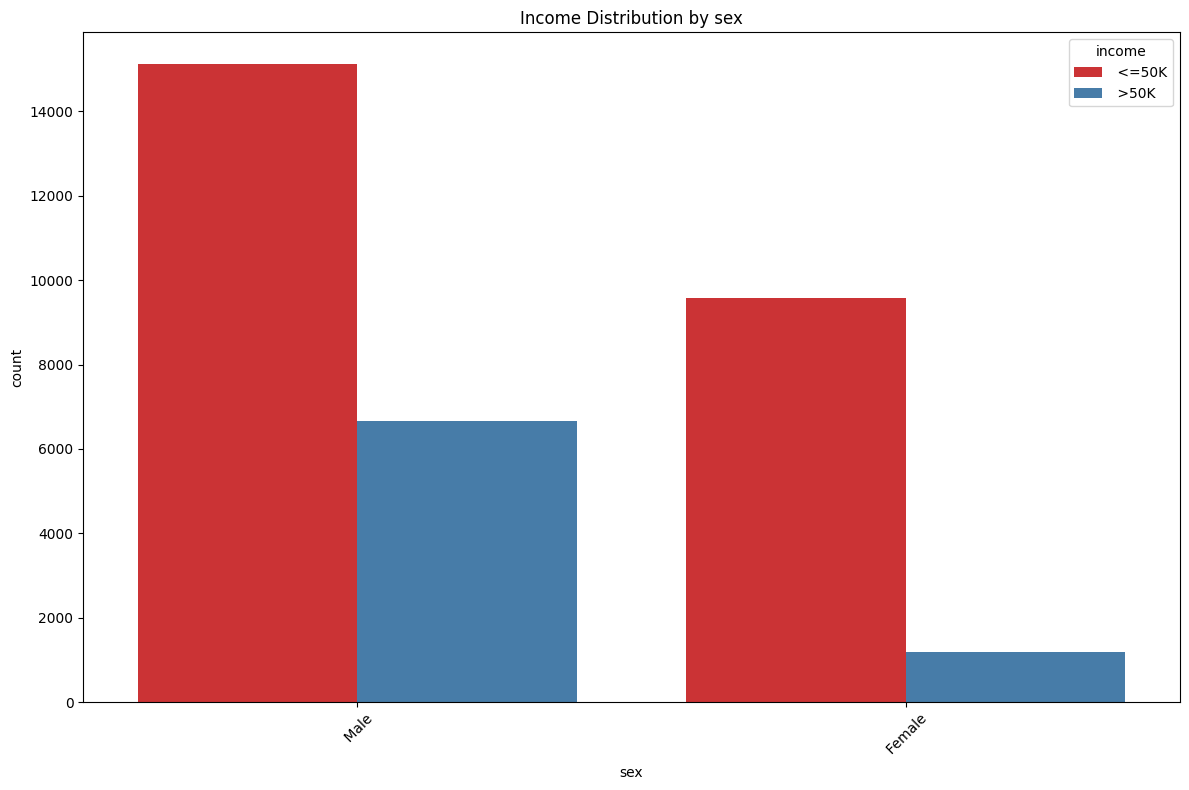

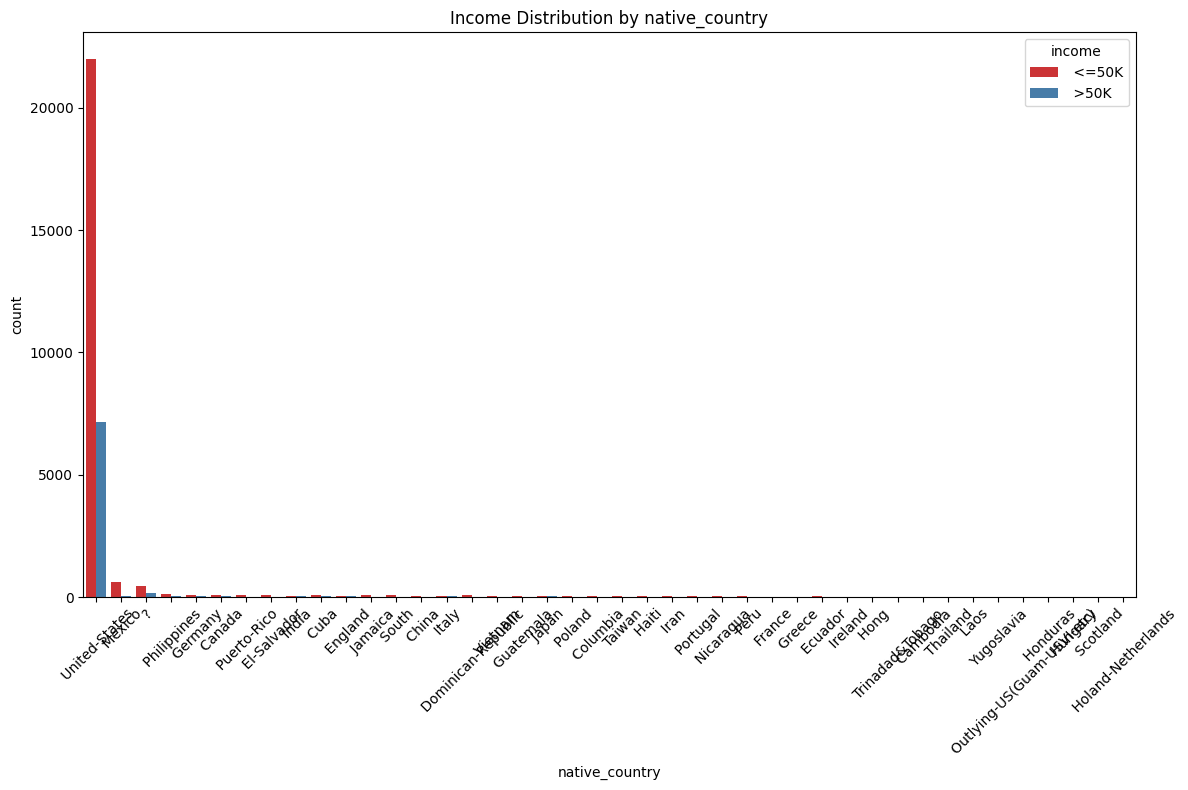

In [32]:
for col in categorical_features:
  plt.figure(figsize=(12,8))
  sns.countplot(data=df, x=col, hue='income', order=df[col].value_counts().index, palette='Set1')
  plt.title(f"Income Distribution by {col}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

## Step 7
## Data Normalization

In [33]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'age_hours_ratio', 'net_capital']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled[num_cols].head()

,age,education_num,capital_gain,capital_loss,hours_per_week,age_hours_ratio,net_capital
0,0.836961,1.134817,-0.145969,-0.216747,-2.222450,1.222439,-0.133713
1,-0.042934,-0.420646,-0.145969,-0.216747,-0.035664,-0.111426,-0.133713
2,1.056935,-1.198377,-0.145969,-0.216747,-0.035664,0.061286,-0.133713
3,-0.776180,1.134817,-0.145969,-0.216747,-0.035664,-0.226567,-0.133713
4,-0.116259,1.523683,-0.145969,-0.216747,-0.035664,-0.122940,-0.133713


In [35]:
df[num_cols].head()

,age,education_num,capital_gain,capital_loss,hours_per_week,age_hours_ratio,net_capital
0,50,13,0,0,13,3.846154,0
1,38,9,0,0,40,0.950000,0
2,53,7,0,0,40,1.325000,0
3,28,13,0,0,40,0.700000,0
4,37,14,0,0,40,0.925000,0


## Step 8
 ## Model Training

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df_model = pd.get_dummies(df_scaled, drop_first=True)

X = df_model.drop('income_ >50K', axis=1)
y = df_model['income_ >50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

results = []

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results.append([name, acc, recall, precision, f1])

  results.append({
      "Model" : name,
      "Accuracy" : acc,
      "Recall" : recall,
      "Precision" : precision,
      "F1 Score" : f1
  })

results_df = pd.DataFrame(results)
results_df

,0,1,2,3,4
0,Random Forest,0.852336,0.621202,0.719311,0.666667
1,Model,Accuracy,Recall,Precision,F1 Score
2,Logistic Regression,0.852643,0.599871,0.731861,0.659325
3,Model,Accuracy,Recall,Precision,F1 Score
4,Decision Tree,0.820529,0.613445,0.624753,0.619048
5,Model,Accuracy,Recall,Precision,F1 Score
6,SVM,0.85756,0.58565,0.760067,0.661555
7,Model,Accuracy,Recall,Precision,F1 Score


## Step 9
## Model Evaluation

<Figure size 800x600 with 0 Axes>

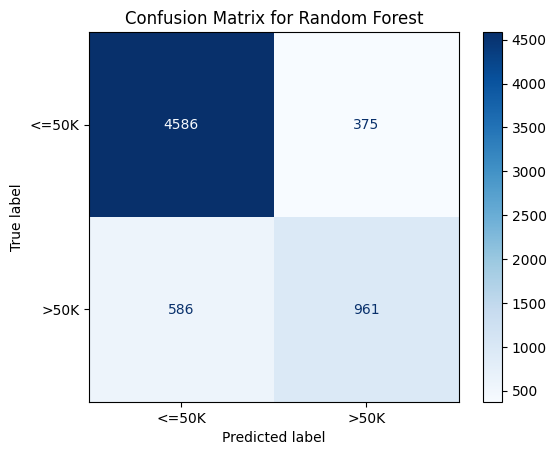

<Figure size 800x600 with 0 Axes>

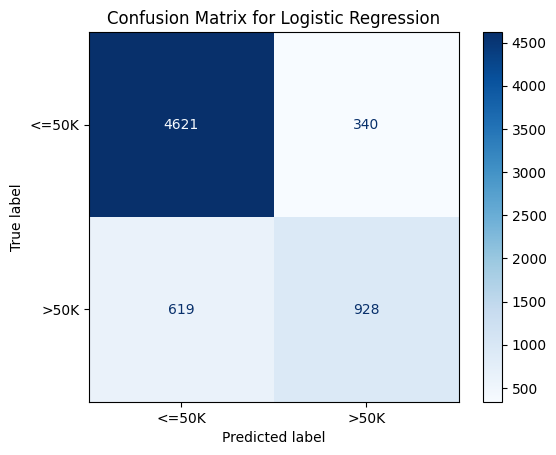

<Figure size 800x600 with 0 Axes>

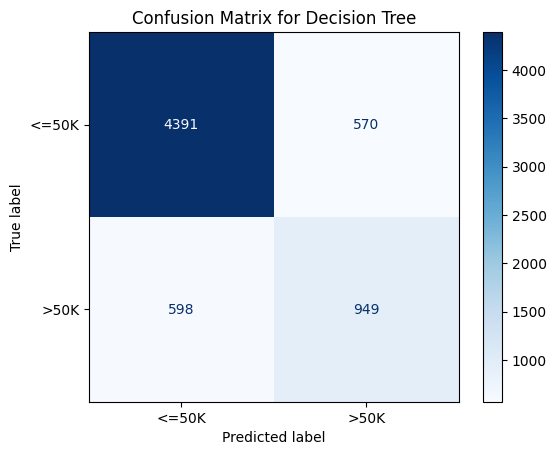

<Figure size 800x600 with 0 Axes>

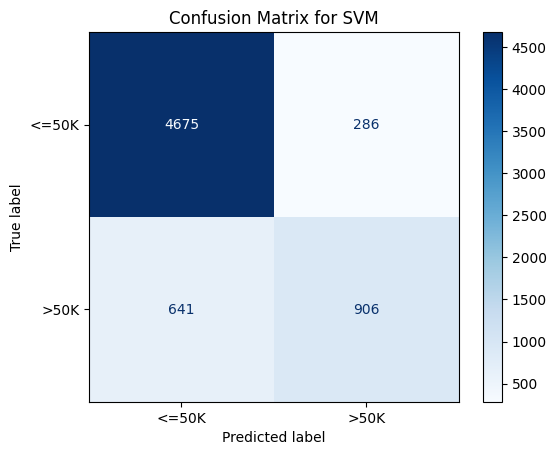

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])

  plt.figure(figsize=(8,6))
  disp.plot(cmap='Blues')
  plt.title(f'Confusion Matrix for {name}')
  plt.show()

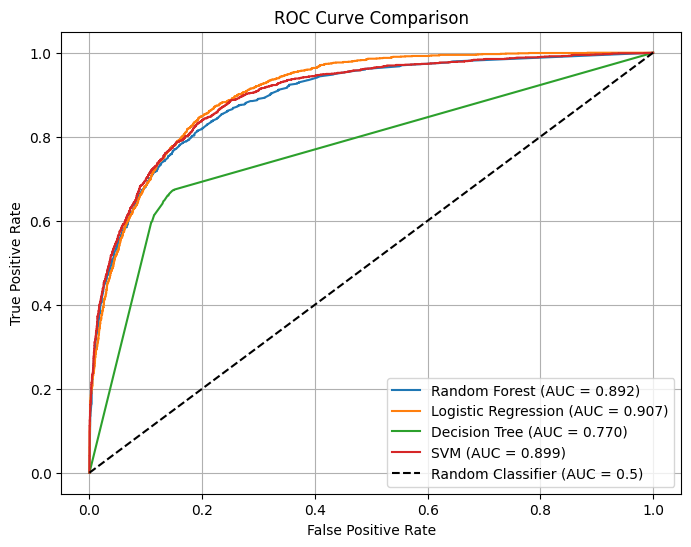

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))

for name, model in models.items():
  if hasattr(model, 'predict_proba'):
    y_scores = model.predict_proba(X_test)[:, 1]
  else:
    y_scores = model.decision_function(X_test)

  fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  auc_score = roc_auc_score(y_test, y_scores)
  plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Step 10
## Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [ 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best F1 Score :", rf_grid.best_score_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score : 0.6865826472210299


In [44]:
from sklearn.metrics import classification_report

y_pred_rf_tuned = rf_grid.predict(X_test)


print("Random Forest Classification Report:", classification_report(y_test, y_pred_rf_tuned))


Random Forest Classification Report:               precision    recall  f1-score   support

       False       0.89      0.94      0.92      4961
        True       0.78      0.63      0.70      1547

    accuracy                           0.87      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

